In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import yfinance as yf
import seaborn as sns


In [5]:
tickers=['NVDA',
        'OPEN',
        'NIO',
        'ONDS',
        'PLUG',
        'BBAI',
        'GOOGL',
        'ABEV',
        'BBWI',
        'VICI',
        'HL',
        'RXRX',
        'ORCL',
        'NOK',
        'CMG',
        'CRWV',
        'PSNYW',
        'TIGR',
        'NTR',
        'HALO',
        'SENEB',
        'CFFI']
data=yf.download(tickers,start="2023-01-01",end='2025-11-26',group_by='ticker')
close_prices =pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
df=close_prices

C:\Users\PC\AppData\Local\Temp\ipykernel_17284\1620671150.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start="2023-01-01",end='2025-11-26',group_by='ticker')
[*********************100%***********************]  22 of 22 completed


In [6]:
daily_returns = df.pct_change()
annual_mean_return=daily_returns.mean()*252
annual_return_variance= daily_returns.var()*252

In [50]:
df2=pd.DataFrame(df.columns,columns=['Stock Ticket'])
df2['Variance']=annual_return_variance.values
df2['Return']=annual_mean_return.values

In [51]:
X=df2[["Variance","Return"]].values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2[["Variance", "Return"]])

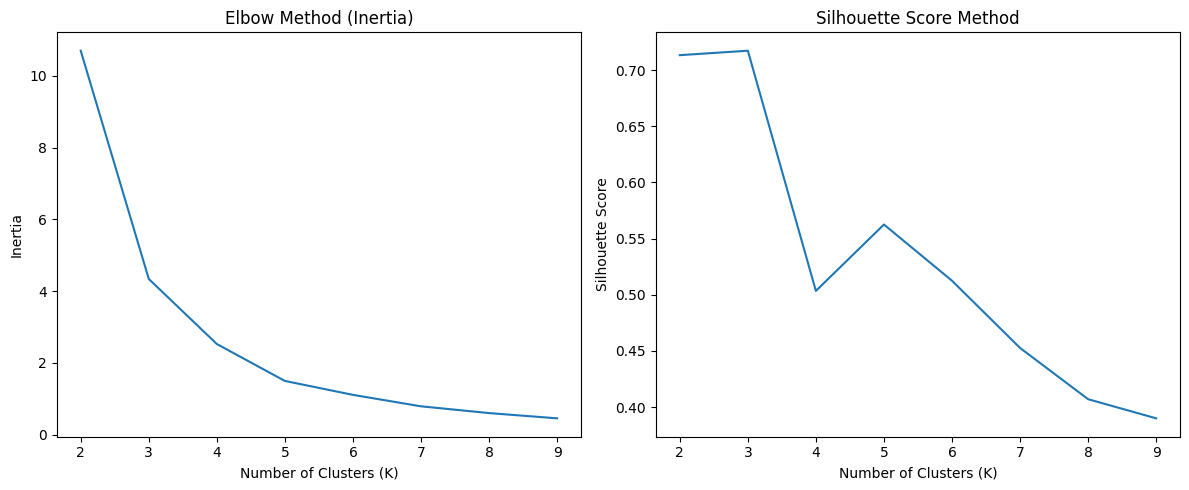

In [52]:
inertia_values=[]
silhouette_values=[]
k_range=range(2,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg=silhouette_score(X_scaled, kmeans.labels_)
    silhouette_values.append(silhouette_avg)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range,inertia_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.subplot(1,2,2)
plt.plot(k_range,silhouette_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

In [53]:
optimal_k= 3
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
clusters=kmeans.fit_predict(X_scaled)
df2['Cluster']=clusters
df2


,Stock Ticket,Variance,Return,Cluster
0,NVDA,0.257805,1.001814,0
1,OPEN,1.570855,1.396216,1
2,NIO,0.447483,0.027560,0
3,ONDS,1.665030,1.382457,1
4,PLUG,1.042874,-0.122762,0
5,BBAI,4.103730,2.022921,2
6,GOOGL,0.093180,0.496030,0
7,ABEV,0.066759,0.069099,0
8,BBWI,0.229352,-0.183169,0
9,VICI,0.035757,0.034922,0


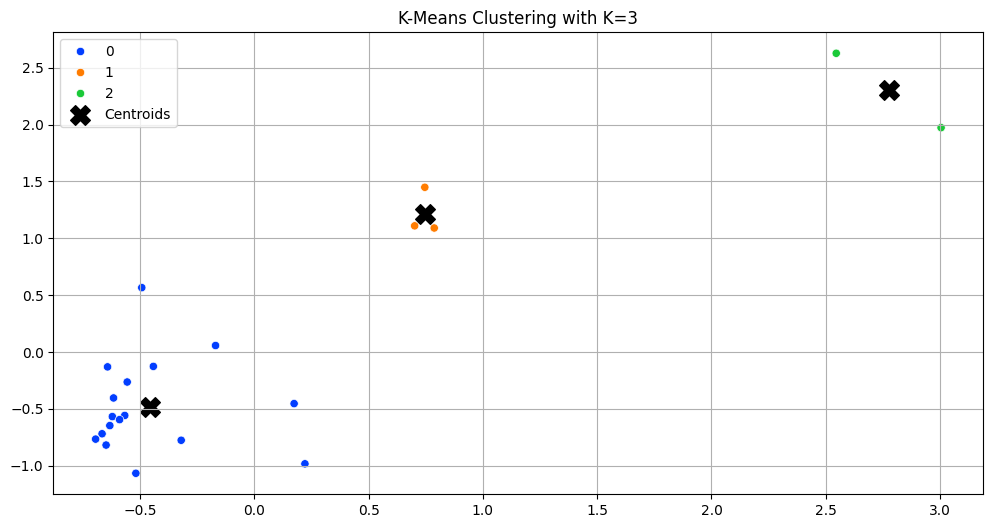

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=df2['Cluster'],palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1 ],color='black', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()
